In [2]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import chi2
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
airport = pd.read_csv("dataset")
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Quarter                                       3501 non-null   object 
 1   Date recorded                                 3501 non-null   object 
 2   Departure time                                3501 non-null   object 
 3   Ground transportation to/from airport         3447 non-null   float64
 4   Parking facilities                            3462 non-null   float64
 5   Parking facilities (value for money)          3455 non-null   float64
 6   Availability of baggage carts                 3410 non-null   float64
 7   Efficiency of check-in staff                  3463 non-null   float64
 8   Check-in wait time                            3462 non-null   float64
 9   Courtesy of of check-in staff                 3449 non-null   f

In [4]:
airport.head()

,Quarter,Date recorded,Departure time,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,3Q16,09/04/2016,11:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,4.0,0.0,4.0,5.0,4.0,4.0,0.0,0.0,0.0
1,2Q16,05/01/2016,16:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
2,2Q16,04/07/2016,11:10,4.0,4.0,4.0,5.0,5.0,5.0,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,NaN,0.0,5.0,0.0
3,3Q16,09/02/2016,17:16,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
4,3Q16,08/04/2016,7:49,5.0,0.0,0.0,0.0,4.0,4.0,4.0,...,2.0,4.0,4.0,2.0,5.0,4.0,4.0,0.0,4.0,0.0


In [5]:
# airport.dropna(inplace = True)
airport.fillna(airport.mode(), inplace=True)
airport.head()

,Quarter,Date recorded,Departure time,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,3Q16,09/04/2016,11:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,4.0,0.0,4.0,5.0,4.0,4.0,0.0,0.0,0.0
1,2Q16,05/01/2016,16:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
2,2Q16,04/07/2016,11:10,4.0,4.0,4.0,5.0,5.0,5.0,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,NaN,0.0,5.0,0.0
3,3Q16,09/02/2016,17:16,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
4,3Q16,08/04/2016,7:49,5.0,0.0,0.0,0.0,4.0,4.0,4.0,...,2.0,4.0,4.0,2.0,5.0,4.0,4.0,0.0,4.0,0.0


In [6]:
airport.shape

(3501, 37)

In [7]:
Q115 = airport[airport["Quarter"].str.contains('1Q15')].reset_index(drop=True)
Q215 = airport[airport["Quarter"].str.contains('2Q15')].reset_index(drop=True)
Q315 = airport[airport["Quarter"].str.contains('3Q15')].reset_index(drop=True)
Q415 = airport[airport["Quarter"].str.contains('4Q15')].reset_index(drop=True)

Q116 = airport[airport["Quarter"].str.contains('1Q16')].reset_index(drop=True)
Q216 = airport[airport["Quarter"].str.contains('2Q16')].reset_index(drop=True)
Q316 = airport[airport["Quarter"].str.contains('3Q16')].reset_index(drop=True)
Q416 = airport[airport["Quarter"].str.contains('4Q16')].reset_index(drop=True)

Q117 = airport[airport["Quarter"].str.contains('1Q17')].reset_index(drop=True)
Q217 = airport[airport["Quarter"].str.contains('2Q17')].reset_index(drop=True)

In [8]:
Q115.drop(['Quarter', 'Date recorded', 'Departure time'], axis=1, inplace=True)
Q215.drop(['Quarter', 'Date recorded', 'Departure time'], axis=1, inplace=True)
Q315.drop(['Quarter', 'Date recorded', 'Departure time'], axis=1, inplace=True)
Q415.drop(['Quarter', 'Date recorded', 'Departure time'], axis=1, inplace=True)

Q116.drop(['Quarter', 'Date recorded', 'Departure time'], axis=1, inplace=True)
Q216.drop(['Quarter', 'Date recorded', 'Departure time'], axis=1, inplace=True)
Q316.drop(['Quarter', 'Date recorded', 'Departure time'], axis=1, inplace=True)
Q416.drop(['Quarter', 'Date recorded', 'Departure time'], axis=1, inplace=True)

Q117.drop(['Quarter', 'Date recorded', 'Departure time'], axis=1, inplace=True)
Q217.drop(['Quarter', 'Date recorded', 'Departure time'], axis=1, inplace=True)

In [9]:
all = [Q115, Q215, Q315, Q415, 
       Q116, Q216, Q316, Q416,
       Q117, Q217]

In [10]:
airportdata = airport.drop(["Quarter", "Date recorded", "Departure time"], axis=1)
airportdata.head()

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,4.0,4.0,...,0.0,4.0,0.0,4.0,5.0,4.0,4.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,3.0,3.0,...,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
2,4.0,4.0,4.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,NaN,0.0,5.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,4.0,...,0.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,4.0,4.0,4.0,5.0,5.0,2.0,...,2.0,4.0,4.0,2.0,5.0,4.0,4.0,0.0,4.0,0.0


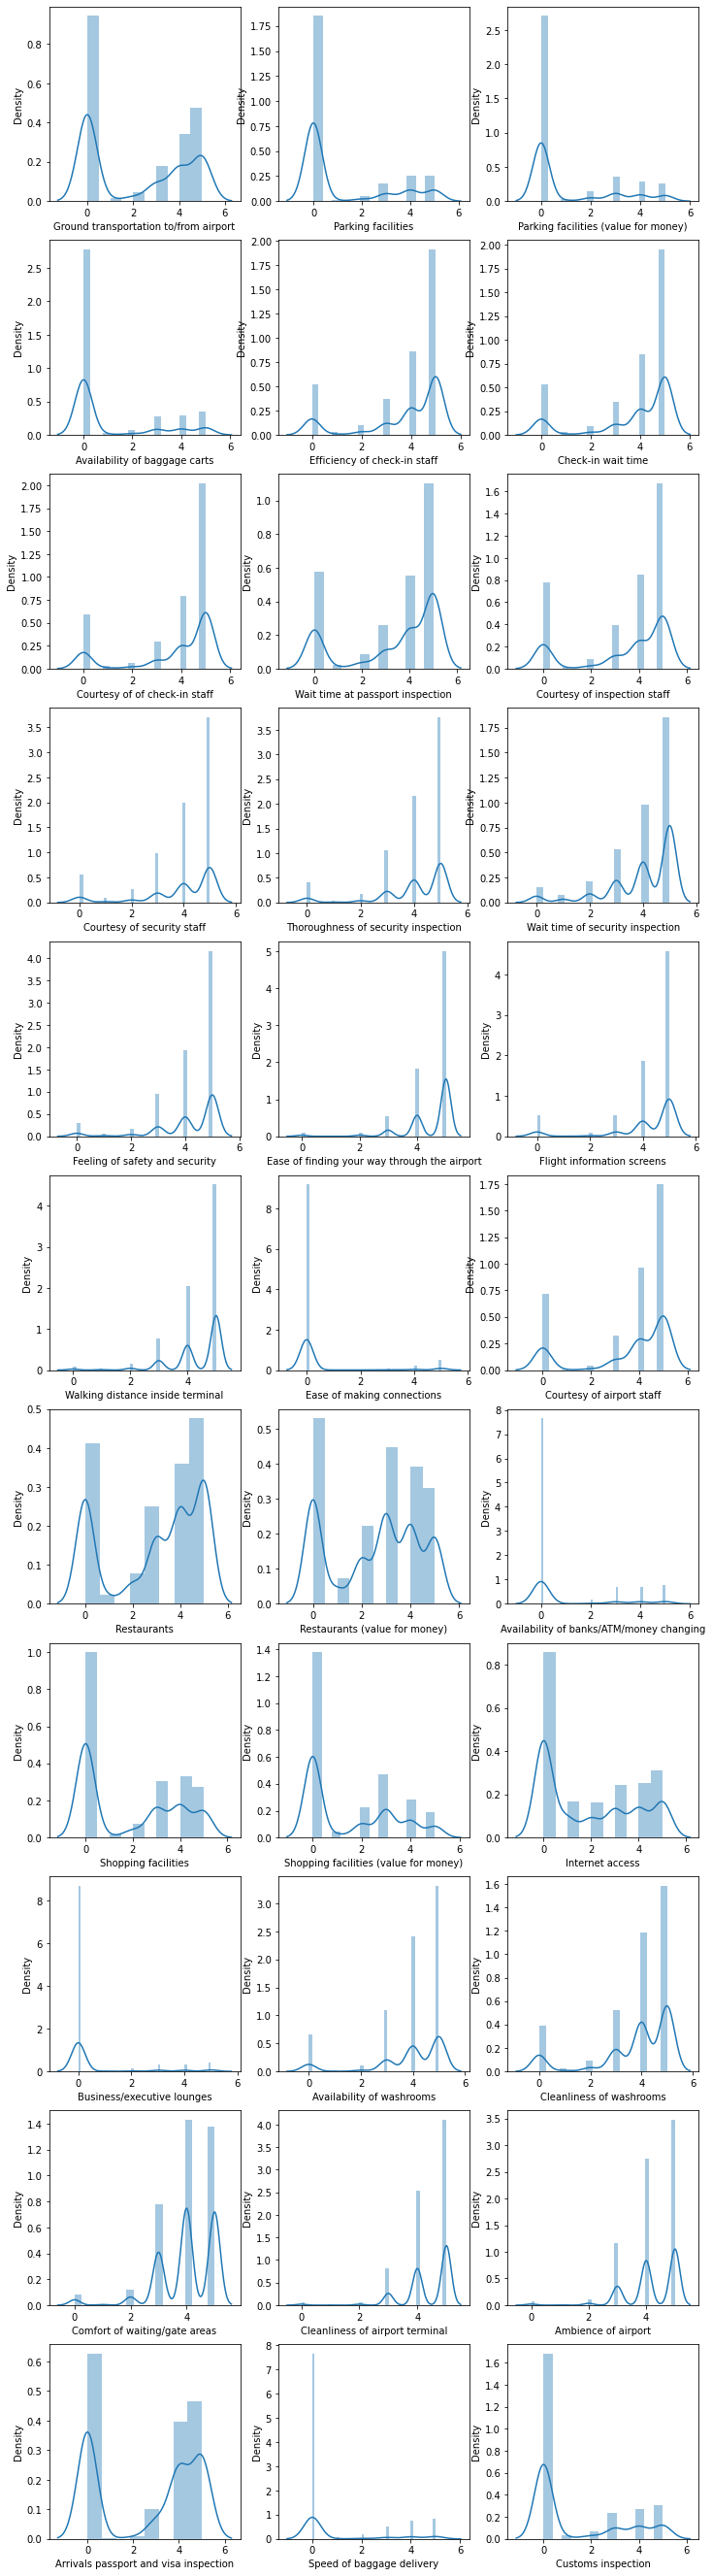

In [11]:
fig, axes = plt.subplots(len(airportdata.columns)//3, 3, figsize=(12, 48))
axes = axes.flatten()
for col, axis in zip(airportdata.columns, axes):
    sns.distplot(airportdata[col], ax=axis)

Diketahui bahwa untuk kolom target, ada banyak yang tidak berdistribusi normal karena ini hanya sample. Karena itu, kita harus menggunakan t square untuk mendapat rataan dan chi square untuk mendapat standard deviasi dari setiap kolom target.

In [12]:
def stat_inference(col, n, dof, p):

    samplemean = col.mean()
    samplestd = col.std()

    sample_squared = col**2
    sum_sample_squared = sample_squared.sum()
    sum_sample = col.sum()
    squared_sum_sample = sum_sample**2
    variance = (n*sum_sample_squared - squared_sum_sample) / (n*dof)

    lowmean, highmean, nilai_t = ttest(n, p, dof, samplemean, samplestd)
    lowvar, highvar = chisquare(n, dof, variance)

    return lowmean, lowvar, highmean, highvar, nilai_t

In [13]:
def ttest(n, p, dof, mean, std):
    t_value = t.ppf(p, dof)
    # p = t.cdf(t_value, dof)
    margin_of_error = t_value * std / np.sqrt(n)
    
    lowbound = mean - margin_of_error
    upbound = mean + margin_of_error

    return lowbound, upbound, t_value

In [14]:
def chisquare(n, dof, vari):
    p1 = 0.975
    chi_value_0975 = chi2.ppf(p1, dof)

    p2 = 0.025
    chi_value_0025 = chi2.ppf(p2, dof)

    lowbound = (n - 1)*vari/chi_value_0975
    upbound = (n - 1)*vari/chi_value_0025

    return lowbound, upbound

In [15]:
def cal_thresh(df, colum, number):
    count=df.loc[:,colum]
    count=count[~ (count<=number)] 
    count=count.shape[0]
    return count

In [16]:
colist = Q115.columns.to_list()
p = 0.975
finaldict = {}
s = {}
var = {}
htf = {}
quarter = 1
year = 2015
for i in range(len(all)):
    num_sample = all[i].shape[0]
    deg = num_sample - 1
    templist = []
    templist2 = []
    templist3 = []
    templist4 = []
    if quarter > 4:
        quarter = 1
        year += 1
    if num_sample > 0:
        sentence = str(year) + "Q" + str(quarter)
        for columns in colist:
            low_mean, low_var, high_mean, high_var, t_val = stat_inference(all[i][columns], num_sample, deg, p)
            templist.append([low_mean, high_mean, low_var, high_var])
            templist2.append(low_mean)
            templist3.append(high_var + low_var)
            templist4.append(cal_thresh(all[i], columns, 4))
        finaldict[sentence] = templist
        s[sentence] = templist2
        var[sentence] = templist3
        htf[sentence] = templist4
    quarter += 1

In [17]:
#inferensi statistika per kuartil
finaldf = pd.DataFrame.from_dict(finaldict, orient='index', columns=colist)
finaldf.head(16)

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
2015Q1,"[1.972493999442234, 2.437910624835223, 4.24602...","[0.926471984646168, 1.3054120733248467, 2.7902...","[0.8871126927942259, 1.2462206405391074, 2.506...","[0.9655947122228791, 1.3657662345226829, 3.070...","[3.88434017914917, 4.20787884102374, 2.1556093...","[3.7162329879761162, 4.075674526474751, 2.6531...","[3.729644031126172, 4.090123410734293, 2.72782...","[3.4600581104553543, 3.8496764028189823, 3.235...","[3.5401550988683224, 3.9105911697883937, 3.069...","[3.901939544973262, 4.184020340413556, 1.59606...",...,"[0.47900707822167815, 0.7948024455878455, 1.89...","[3.880767445677395, 4.165342064409061, 1.69366...","[3.7837714953891357, 4.0930613491856445, 2.164...","[3.9393750517468376, 4.15860765718688, 1.05533...","[4.371587866751444, 4.541706930936417, 0.75596...","[4.298870434767505, 4.459147057943866, 0.82025...","[0.01673222406902975, 0.1296092393456044, 0.23...","[2.0605711231006962, 2.4994288768993034, 3.805...","[0.00428836973922616, 0.0941731687223123, 0.14...","[4.392185077560298, 4.536386351011131, 1.05657..."
2015Q2,"[1.755529474167401, 2.2214820200854724, 4.2727...","[0.8695320343752235, 1.2460749020409616, 2.765...","[0.7920283344577951, 1.1442035496001761, 2.413...","[0.729737523830756, 1.082579191711766, 2.40057...","[3.498945621995426, 3.8839115208617168, 2.9737...","[3.6531545239031935, 4.008736593575317, 2.5807...","[3.4702218516447325, 3.861190252101665, 3.1360...","[3.1804048332327146, 3.582600947114106, 3.3030...","[3.1984236950657645, 3.5980879328412123, 3.302...","[3.657412932348555, 3.976872781937159, 2.07331...",...,"[0.267196432516819, 0.5154122631353549, 1.1937...","[3.910568851823123, 4.174901233646962, 1.41467...","[3.7779395729118956, 4.06821427324195, 1.69534...","[3.9901663204791396, 4.187484109320287, 0.8843...","[4.287852745693453, 4.458586000745294, 0.62050...","[4.105568728997915, 4.299055548458733, 0.98317...","[4.266692424649493, 4.431254789426752, 1.01537...","[0.050239895938530704, 0.20647652197191704, 0....","[2.0948875324139866, 2.5293548918284374, 3.762...","[0.017079599718483246, 0.1362946334103511, 0.2..."
2015Q3,"[1.9666822481047406, 2.4194848988693227, 4.008...","[1.0149672303546515, 1.4000183604234466, 2.888...","[0.8708158992735819, 1.2222073565403717, 2.392...","[0.8893151912493924, 1.268119211082969, 2.7734...","[3.547912934699072, 3.9129566305183188, 2.7117...","[3.4959587598317503, 3.8815628540011025, 2.956...","[3.5404736628836835, 3.9203959023337074, 2.925...","[2.9028580755004354, 3.34062018536913, 3.79859...","[3.0722667535780674, 3.5049927216405914, 3.755...","[3.902778726665112, 4.184940571580502, 1.80418...",...,"[0.4424197566282445, 0.7412537127595106, 1.720...","[3.625143606329719, 3.94382191091166, 2.014860...","[3.459190474536613, 3.803057364080102, 2.36320...","[3.880720906625693, 4.101786382004045, 1.17266...","[4.3134381613673405, 4.469170534284833, 0.6584...","[4.164782855221746, 4.3438876650094675, 0.7556...","[4.3004587312919575, 4.445103398885557, 0.9032...","[0.05528528850600094, 0.2207883311259009, 0.50...","[1.7573226683027101, 2.187799282916802, 3.5947...","[0.018273356205641786, 0.14788048994820435, 0...."
2015Q4,"[2.1719119528483275, 2.6373366020649676, 4.269...","[0.9262633496766559, 1.3331026445596554, 3.230...","[0.7847306857068619, 1.1401248056226179, 2.459...","[0.8150911162757728, 1.1907059851735027, 2.741...","[3.5876638356835757, 3.951241063451871, 2.7091...","[3.553547506056861,

In [18]:
#lower bound
s_df = pd.DataFrame.from_dict(s, orient='index', columns=colist)
s_df.head(16)

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
2015Q1,1.972494,0.926472,0.887113,0.965595,3.884340,3.716233,3.729644,3.460058,3.540155,3.901940,...,0.479007,3.880767,3.783771,3.939375,4.371588,4.298870,0.016732,2.060571,0.004288,4.392185
2015Q2,1.755529,0.869532,0.792028,0.729738,3.498946,3.653155,3.470222,3.180405,3.198424,3.657413,...,0.267196,3.910569,3.777940,3.990166,4.287853,4.105569,4.266692,0.050240,2.094888,0.017080
2015Q3,1.966682,1.014967,0.870816,0.889315,3.547913,3.495959,3.540474,2.902858,3.072267,3.902779,...,0.442420,3.625144,3.459190,3.880721,4.313438,4.164783,4.300459,0.055285,1.757323,0.018273
2015Q4,2.171912,0.926263,0.784731,0.815091,3.587664,3.553548,3.607337,3.131546,3.228838,3.832362,...,0.389149,3.669826,3.624278,3.833208,4.223072,4.150250,4.264809,0.039482,1.974358,0.013211
2016Q1,2.132824,0.957367,0.834725,0.927575,3.408855,3.510503,3.552502,2.856225,3.133607,3.731670,...,0.274914,3.923314,3.658573,3.935643,4.351063,4.179902,4.274157,0.000640,2.222874,0.000775
2016Q2,1.894078,0.866007,0.787379,0.765504,3.474559,3.525875,3.544676,3.001328,3.222685,3.810223,...,0.473598,3.676626,3.573468,3.867572,4.317491,4.076352,4.227494,0.010397,1.849555,0.012021
2016Q3,2.051312,1.018153,0.884779,0.929697,3.648420,3.610533,3.651070,3.043757,3.159892,3.693482,...,0.290858,3.695168,3.580441,3.860672,4.194141,4.060419,4.184944,0.007705,1.973893,-0.007617
2016Q4,1.946560,0.928633,0.791631,0.839137,3.550210,3.428498,3.434913,3.082980,3.159816,3.714688,...,0.255018,3.667050,3.651174,3.914403,4.331524,4.173529,0.016764,1.789753,0.001556,4.282690
2017Q1,1.776229,1.010538,0.983654,0.874618,3.869499,3.995814,3.883137,3.593926,3.618254,4.087195,...,0.320792,3.885547,3.756626,3.956572,4.338198,4.191011,0.031866,2.256546,0.008289,4.379246
2017Q2,1.944562,0.828046,0.756847,0.739631,3.509677,3.591263,3.496583,3.170322,3.224159,3.797406,...,0.272996,3.647484,3.551889,3.775238,4.170449,4.001119,0.001397,1.681933,-0.004243,4.195919


In [19]:
#jumlah dari batas atas dan bawah variansi
var_df = pd.DataFrame.from_dict(var, orient='index', columns=colist)
var_df.head(16)

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
2015Q1,9.961320,6.546063,5.879363,7.204274,5.057128,6.224291,6.399569,7.591569,7.201477,3.744420,...,4.434859,3.973401,5.079053,2.475843,1.773517,1.924340,0.549754,8.927334,0.345328,2.478756
2015Q2,10.019079,6.484649,5.659973,5.629083,6.973148,6.051559,7.353626,7.745361,7.743304,4.861693,...,2.799196,3.317252,3.975386,2.073655,1.455016,2.305447,2.380933,1.075986,8.822992,0.609538
2015Q3,9.405879,6.778241,5.613590,6.508133,6.363334,6.938845,6.865876,8.913818,8.813189,4.233717,...,4.037415,4.728088,5.545510,2.751776,1.545165,1.773213,2.119638,1.175701,8.435387,0.718233
2015Q4,10.014837,7.576903,5.769349,6.430779,6.354179,5.770773,6.459877,7.968346,7.743245,3.948124,...,3.762449,4.805854,5.346889,3.015646,2.184332,1.927718,2.523141,0.952107,8.648744,0.491612
2016Q1,9.770194,7.362754,6.105897,7.091356,6.238275,6.805742,6.924885,8.390081,8.338692,4.534609,...,3.111347,3.576400,4.543348,2.394538,1.335781,2.577573,2.357382,0.340017,8.733428,0.340017
2016Q2,9.501243,6.516099,5.594447,5.941623,5.735532,6.364610,6.672315,7.980645,7.766697,4.188765,...,4.178493,4.499067,5.035021,2.285466,1.844184,2.124655,2.556015,0.487910,8.392229,0.464604
2016Q3,9.674947,7.258479,5.831735,6.370846,5.468359,6.014408,5.881786,7.936848,7.614159,4.592901,...,2.941280,4.595596,5.195351,2.308332,1.882729,2.305654,2.777722,0.433468,8.682159,0.145691
2016Q4,9.352768,7.198214,5.845536,6.508041,6.667188,7.505670,7.836215,8.600251,8.602049,5.028029,...,2.866451,5.095833,5.047223,2.231530,1.721578,1.446452,0.601377,9.023471,0.340017,2.386881
2017Q1,9.687117,7.529433,6.741517,6.932389,5.709996,4.666425,5.665902,6.964366,6.702753,3.595908,...,3.303708,4.269620,4.558575,2.630924,1.872767,2.601197,0.903446,8.913965,0.521372,2.012925
2017Q2,9.515909,6.531480,5.673605,5.872371,7.263538,6.459016,7.571260,8.557302,8.220697,4.778872,...,2.941962,5.235452,5.231590,2.685180,1.924823,2.106210,0.484032,8.415518,0.288927,2.094024


In [20]:
#lebih dari atau sama dengan 4
htf_df = pd.DataFrame.from_dict(htf, orient='index', columns=colist)
htf_df.head(16)

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
2015Q1,88,29,25,52,201,197,202,179,177,173,...,33,168,168,141,209,186,24,95,26,201
2015Q2,86,36,31,37,184,187,186,152,150,160,...,18,163,156,139,190,164,183,22,90,28
2015Q3,75,30,22,34,173,183,185,139,159,175,...,23,141,137,131,185,165,176,29,75,28
2015Q4,104,50,30,39,178,159,176,151,158,166,...,23,147,153,129,193,163,187,19,80,20
2016Q1,94,41,28,44,151,179,186,128,155,168,...,19,161,141,143,204,184,175,13,91,15
2016Q2,81,32,25,39,149,166,175,136,150,171,...,26,145,134,110,186,145,163,20,69,23
2016Q3,94,43,28,35,165,169,174,136,139,155,...,25,142,144,119,175,150,154,20,85,25
2016Q4,80,40,31,45,177,179,188,150,158,170,...,18,154,151,127,191,156,20,85,26,167
2017Q1,85,45,35,47,219,220,225,193,186,206,...,21,173,157,140,206,178,16,91,18,203
2017Q2,84,36,28,39,183,179,191,162,165,179,...,29,152,140,116,170,141,19,68,25,165


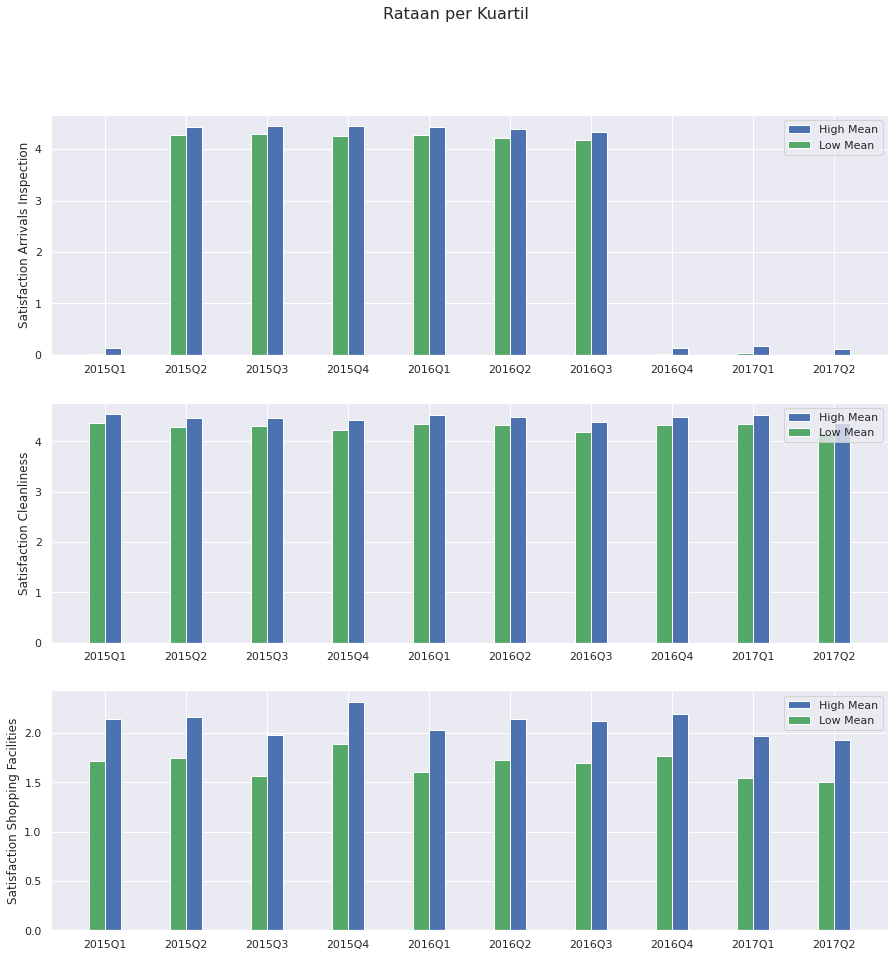

In [21]:
sns.set(rc={'figure.figsize':(15,15)})
quarter = finaldf.index.values
y = finaldf["Arrivals passport and visa inspection"].map(lambda x: x[0])
z = finaldf["Arrivals passport and visa inspection"].map(lambda x: x[1])

a = finaldf["Cleanliness of airport terminal"].map(lambda x: x[0])
b = finaldf["Cleanliness of airport terminal"].map(lambda x: x[1])

c = finaldf["Shopping facilities"].map(lambda x: x[0])
d = finaldf["Shopping facilities"].map(lambda x: x[1])

fig, ax = plt.subplots(3,1)
ax[0].bar(quarter, z, width=0.2,align='edge', color = 'b')
ax[0].bar(quarter, y, width=-0.2, align='edge', color = 'g')
ax[0].set_ylabel('Satisfaction Arrivals Inspection')

ax[1].bar(quarter, b, width=0.2,align='edge', color = 'b')
ax[1].bar(quarter, a, width=-0.2, align='edge', color = 'g')
ax[1].set_ylabel('Satisfaction Cleanliness')

ax[2].bar(quarter, d, width=0.2,align='edge', color = 'b')
ax[2].bar(quarter, c, width=-0.2, align='edge', color = 'g')
ax[2].set_ylabel('Satisfaction Shopping Facilities')

ax[0].legend(['High Mean', 'Low Mean'])
ax[1].legend(['High Mean', 'Low Mean'])
ax[2].legend(['High Mean', 'Low Mean'])
fig.suptitle('Rataan per Kuartil', fontsize=16)
plt.show()

In [22]:
# import plotly.graph_objects as go

# quarter = finaldf.index.values

# open_data = finaldf["Arrivals passport and visa inspection"].map(lambda x: x[0])
# high_data = finaldf["Arrivals passport and visa inspection"].map(lambda x: x[1])
# low_data = open_data - finaldf["Arrivals passport and visa inspection"].map(lambda x: np.sqrt(x[2]))
# close_data = high_data + finaldf["Arrivals passport and visa inspection"].map(lambda x: np.sqrt(x[3]))
# dates = quarter

# fig = go.Figure(data=[go.Candlestick(x=quarter,
#                        open=open_data, high=high_data,
#                        low=low_data, close=close_data)])

# fig.show()

<h1> Jawaban untuk inferensi statistika

<h1> A - Batas bawah kepuasan layanan

Batas bawah = low_mean - tvalue * low_std / sqrt(n)
p = 0.025, dof = n-1   

In [23]:
s_df.loc["mean"] = s_df.mean()

In [82]:
s_df_mean = s_df.mean().to_frame()

In [83]:
s_df_mean = s_df_mean.rename(columns = {0: 'Average Low Limit of Services'}, inplace = False)

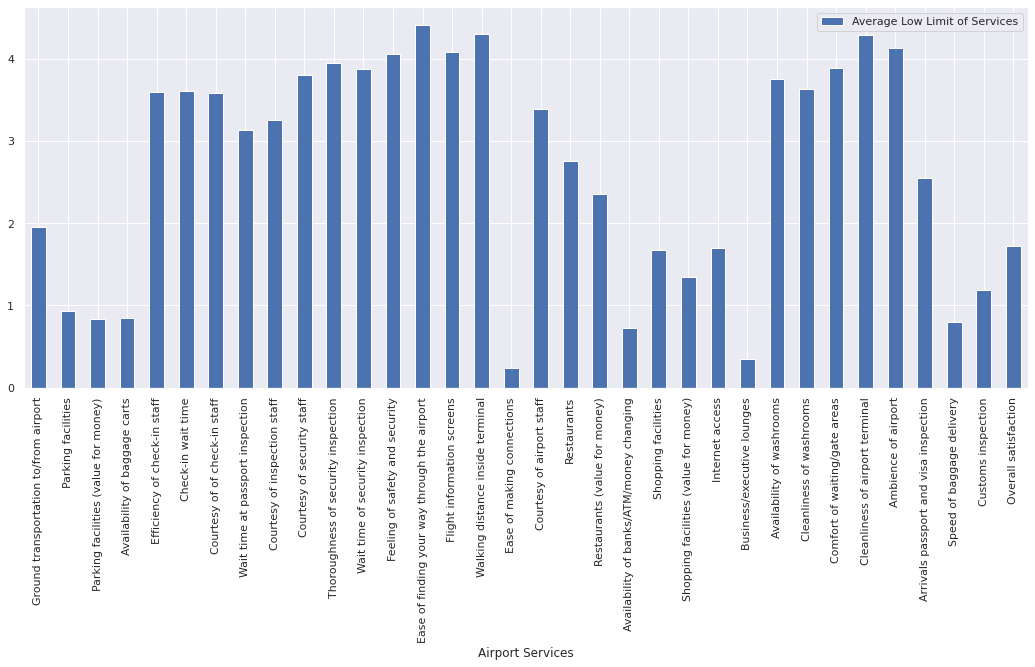

In [84]:
s_df_mean.plot.bar(xlabel='Airport Services')

<h1> B - Banyaknya responden yang puas
<!-- <h5> Manajemen mengasumsikan bahwa seseorang tergolong‘puas‘ terhadap suatu layanan jika ia mengisi skor lebih besar atau sama dengan 4. Berikan inferensi statistika untuk proporsi banyaknya responden yang tergolong ‘puas‘ terhadap layanan yang Anda analisis. -->

In [25]:
size = airportdata.shape[0]
htf_stat = {}
temp = []
quarter = 1
year = 2015

In [26]:
for columns in colist:
    lm, lv, hm, hv, tval = stat_inference(htf_df[columns], size, size-1, p)
    temp.append([lm, hm, lv, hv])
htf_stat["final"] = temp

In [40]:
htf_stat_df = pd.DataFrame.from_dict(htf_stat, orient='index', columns=colist)
htf_stat_df.head(16)

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
final,"[86.82256499497795, 87.37743500502204, 20.8077...","[37.97374471482663, 38.426255285173376, 4.0837...","[28.176954174622335, 28.423045825377667, 2.212...","[40.91032138084984, 41.289678619150166, 4.6752...","[177.29829176732176, 178.70170823267824, 87.28...","[181.2286640042123, 182.37133599578772, 90.631...","[188.29460859951894, 189.30539140048108, 97.52...","[151.92195348111213, 153.27804651888786, 64.36...","[159.2494212525908, 160.15057874740918, 69.826...","[171.84403812457953, 172.7559618754205, 81.216...",...,"[23.337478828790495, 23.662521171209505, 1.561...","[154.22863833738506, 154.97136166261492, 65.32...","[147.7463922786765, 148.4536077213235, 59.9406...","[129.1179349211406, 129.8820650788594, 45.9427...","[190.4749462425895, 191.3250537574105, 99.5311...","[162.6789198261241, 163.7210801738759, 73.0542...","[109.05906402663142, 114.34093597336859, 49.53...","[45.07004002860816, 47.329959971391844, 8.6607...","[57.483434149250705, 59.516565850749295, 11.61...","[84.71646349861172, 90.28353650138828, 38.1498..."


In [44]:
htf_mean = htf_stat_df.loc["final"].map(lambda x: x[0])
htf_mean = htf_mean.to_frame()

In [79]:
htf_mean = htf_mean.rename(columns = {'final': 'Average Num of Satisfied People'}, inplace = False)

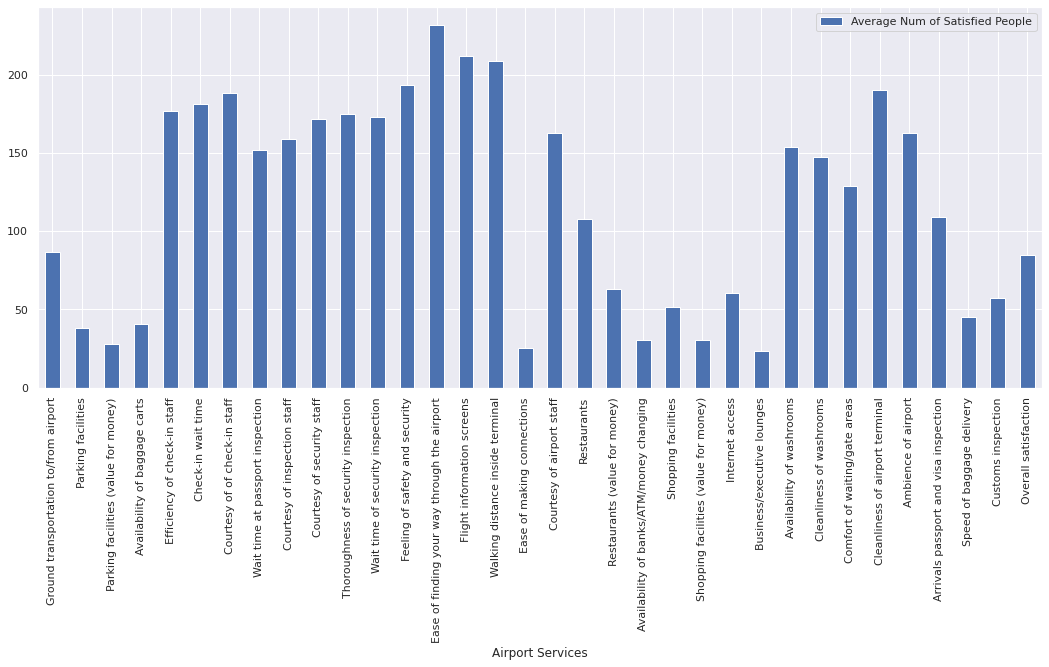

In [80]:
sns.set(rc={'figure.figsize':(18,7)})
htf_mean.plot.bar(xlabel='Airport Services')

<h1> C - Keseragaman/kevariativan Layanan

In [30]:
tes = var_df.mean().mean()
tes

5.044694937216683

In [31]:
threshold = tes
variatif = var_df[(var_df > threshold)]
variatif        

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
2015Q1,9.961320,6.546063,5.879363,7.204274,5.057128,6.224291,6.399569,7.591569,7.201477,NaN,...,NaN,NaN,5.079053,NaN,NaN,NaN,NaN,8.927334,NaN,NaN
2015Q2,10.019079,6.484649,5.659973,5.629083,6.973148,6.051559,7.353626,7.745361,7.743304,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.822992,NaN
2015Q3,9.405879,6.778241,5.613590,6.508133,6.363334,6.938845,6.865876,8.913818,8.813189,NaN,...,NaN,NaN,5.545510,NaN,NaN,NaN,NaN,NaN,8.435387,NaN
2015Q4,10.014837,7.576903,5.769349,6.430779,6.354179,5.770773,6.459877,7.968346,7.743245,NaN,...,NaN,NaN,5.346889,NaN,NaN,NaN,NaN,NaN,8.648744,NaN
2016Q1,9.770194,7.362754,6.105897,7.091356,6.238275,6.805742,6.924885,8.390081,8.338692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.733428,NaN
2016Q2,9.501243,6.516099,5.594447,5.941623,5.735532,6.364610,6.672315,7.980645,7.766697,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.392229,NaN
2016Q3,9.674947,7.258479,5.831735,6.370846,5.468359,6.014408,5.881786,7.936848,7.614159,NaN,...,NaN,NaN,5.195351,NaN,NaN,NaN,NaN,NaN,8.682159,NaN
2016Q4,9.352768,7.198214,5.845536,6.508041,6.667188,7.505670,7.836215,8.600251,8.602049,NaN,...,NaN,5.095833,5.047223,NaN,NaN,NaN,NaN,9.023471,NaN,NaN
2017Q1,9.687117,7.529433,6.741517,6.932389,5.709996,NaN,5.665902,6.964366,6.702753,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.913965,NaN,NaN
2017Q2,9.515909,6.531480,5.673605,5.872371,7.263538,6.459016,7.571260,8.557302,8.220697,NaN,...,NaN,5.235452,5.231590,NaN,NaN,NaN,NaN,8.415518,NaN,NaN


In [32]:
seragam = var_df[(var_df < threshold)]
seragam

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
2015Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.744420,...,4.434859,3.973401,NaN,2.475843,1.773517,1.924340,0.549754,NaN,0.345328,2.478756
2015Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.861693,...,2.799196,3.317252,3.975386,2.073655,1.455016,2.305447,2.380933,1.075986,NaN,0.609538
2015Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.233717,...,4.037415,4.728088,NaN,2.751776,1.545165,1.773213,2.119638,1.175701,NaN,0.718233
2015Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.948124,...,3.762449,4.805854,NaN,3.015646,2.184332,1.927718,2.523141,0.952107,NaN,0.491612
2016Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.534609,...,3.111347,3.576400,4.543348,2.394538,1.335781,2.577573,2.357382,0.340017,NaN,0.340017
2016Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188765,...,4.178493,4.499067,5.035021,2.285466,1.844184,2.124655,2.556015,0.487910,NaN,0.464604
2016Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.592901,...,2.941280,4.595596,NaN,2.308332,1.882729,2.305654,2.777722,0.433468,NaN,0.145691
2016Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.028029,...,2.866451,NaN,NaN,2.231530,1.721578,1.446452,0.601377,NaN,0.340017,2.386881
2017Q1,NaN,NaN,NaN,NaN,NaN,4.666425,NaN,NaN,NaN,3.595908,...,3.303708,4.269620,4.558575,2.630924,1.872767,2.601197,0.903446,NaN,0.521372,2.012925
2017Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.778872,...,2.941962,NaN,NaN,2.685180,1.924823,2.106210,0.484032,NaN,0.288927,2.094024


In [67]:
var_df_mean = var_df.mean().to_frame()

In [77]:
var_df_mean = var_df_mean.rename(columns = {0: 'Average Num of Variance Sum'}, inplace = False)

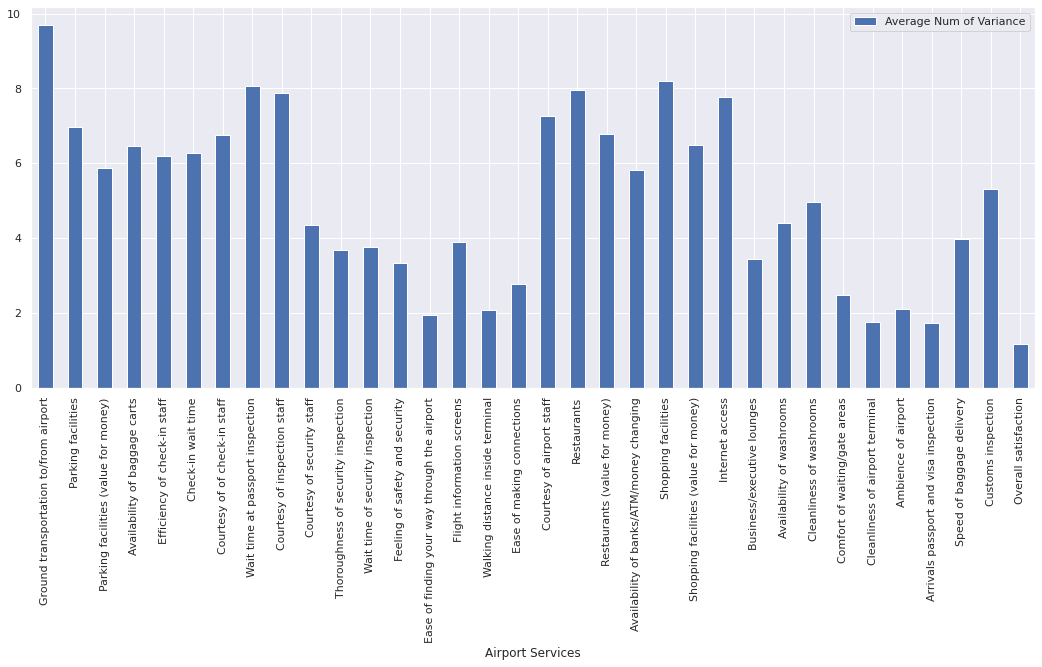

In [78]:
var_df_mean.plot.bar(xlabel='Airport Services')

<h1> D - Layanan yang harus didampingi

Dari hasil diskusi A, B dan C maka kami membandingkan 2 layanan yang memiliki Batas bawah rating terendah dan kepuasan terendah. Layanan tersebut adalah <b> Ease of Making connections </b> dan <b> Business/Executive Lounges </b>

Kemudian dari antara 2 layanan tersebut kami memilih yang variansinya lebih kecil

Kami akhirnya memiliki <b> Ease of Making Connections </b> Untuk mendapatkan pendampingan khusus dari manajemen